# Assignment 2:  the perceptron

Due date:  Friday 9/21 at 11:59pm


**Namita Kharat**


## Datasets

In this assignment we will use the following datasets:
  * The [Gisette](http://archive.ics.uci.edu/ml/datasets/Gisette) handwritten digit recognition dataset. 
  * The [QSAR](http://archive.ics.uci.edu/ml/datasets/QSAR+biodegradation) data for predicting the biochemical activity of a molecule.
  * The [Heart disease diagnosis](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) dataset.
  * For developing your code, you can use one of the scikit-learn datasets, such as the [breast cancer wisconsin dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) and the [make_classification](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification) toy dataset generator.
  
When writing your notebook, you can assume the datasets are in the same directory as the notebook.  Please keep the same file names as in the UCI repository.
  

## Part 1:  Variants of the perceptron algorithm 

In this assignment you will work with several variants of the perceptron algorithm:

  * The "vanila" version of the perceptron algorithm, which was introduced in class.
  * The pocket algorithm as described in the slides or page 80 in the book.
  * The **adatron** version of the perceptron described next.

In each case make sure that your implementation of the classifier **includes a bias term** (in slide set 2 and page 7 in the book you will find guidance on how to add a bias term to an algorithm that is expressed without one).

## The adatron 

Before we get to the adatron, we will derive an alternative form of the perceptron algorithm --- the dual perceptron algorithm.  All we need to look at is the weight update rule:

$$\mathbf{w} \rightarrow \mathbf{w} + \eta y_i \mathbf{x}_i.$$

This is performed whenever example $i$ is misclassified by the current weight vector.  The thing to notice, is that the weight vector is always a weighted combination of the training examples since it is that way to begin with, and each update maintains that property.  So in fact, rather than representing $\mathbf{w}$ explicitly, all we need to do is to keep track of how much each training example is contributing to the value of the weight vector, i.e. we will express it as:

$$\mathbf{w} = \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i,$$

where $\alpha_i$ are positive numbers that describe the magnitude of the contribution $\mathbf{x}_i$ is making to the weight vector, and $N$ is the number of training examples.

Therefore to initialize $\mathbf{w}$ to 0, we simply initialize $\alpha_i = 0$ for $i = 1,\ldots,N$.  When expressed using the variables $\alpha_i$, the perceptron update rule becomes:

$$\alpha_i = \alpha_i + \eta y_i,$$

and you can always retrieve the weight vector using its expansion in terms of the $\alpha_i$.

Now we're ready for the adatron - the only difference is in the initialization and update equation.

Initialization:

$\alpha_i = 1$ for $i = 1,\ldots,N$

Like in the perceptron we run the algorithm until convergence, or until a fixed number of epochs has passed (an epoch is a loop over all the training data), and an epoch of training consists of the following procedure:

for each training example $i=1,\ldots,N$ perform the following steps:

1.  $\gamma = y_i * \mathbf{w}^{t} \mathbf{x}_i$
2.  $\delta\alpha = \eta * (1 - \gamma)$
3.  `if` $(\alpha_i + \delta\alpha < 0)$ : $\alpha_i = 0$, `else : ` $\alpha_i = \alpha_i + \delta\alpha$


The variable $\eta$ plays the role of the learning rate $\eta$ employed in the perceptron algorithm and $\delta \alpha$ is the proposed magnitude of change in $\alpha_i$. 
We note that the adatron tries to maintain a **sparse** representation in terms of the training examples by keeping many $\alpha_i$ equal to zero.  The adatron converges to a special case of the SVM algorithm that we will learn later in the semester; this algorithm tries to maximize the margin with which each example is classified, which is captured by the variable $\gamma$ in the algorithm (notice that the magnitude of change proposed for each $\alpha_i$ becomes smaller as $\gamma$ increases towards 1).

**Note:** if you observe an overflow issues in running the adatron, add an upper bound on the value of $\alpha_i$.

Here's what you need to do:

  - Implement the pocket algorithm and the adatron; each classifier should be implemented in a separate Python class, and use the same interface used in the code provided for the perceptron algorithm, i.e. provides the same methods with the same signature.  Make sure each classifier you use (including the original version of the perceptron) implements a bias term.
  - Compare the performance of these variants of the perceptron on the Gisette and QSAR datasets by computing an estimate of the out of sample error on a sample of the data that you reserve for testing (the test set).  In each case reserve about 60% of the data for training, and 40% for testing.  To gain more confidence in our error estimates, repeat this experiment using 10 random splits of the data into training/test sets.  Report the average error and its standard deviation in a nicely formatted table.  Is there a version of the perceptron that appears to perform better?   (In answering this, consider the differences in performance you observe in comparison to the standard deviation).



## Import Libraries

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statistics as stat
import matplotlib.pyplot as plt
%matplotlib inline

## Perceptron Algorithm

In [5]:
class Perceptron :
 
    """An implementation of the perceptron algorithm.
    This implementation includes a bias term"""
 
    def __init__(self, max_iterations=100, learning_rate=0.2) :
 
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
 
    def fit(self, X, y) :
        """
        Train a classifier using the perceptron training algorithm.
        After training the attribute 'w' will contain the perceptron weight vector.
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
 
        y : ndarray, shape (n_examples,)
        Array of labels.
 
        """
        ones = np.ones((np.size(X, 0), 1))       # Vector of all 1's
        X = np.append(ones, X, 1)                # Bias term added to the X(Training data)
        self.w = np.zeros(len(X[0]))             # Initializing the weight vector
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) :  # if misclassified
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 :
                    self.w = self.w + y[i] * self.learning_rate * X[i]  #update w
                    converged = False
            iterations += 1
        self.converged = converged
 
    def decision_function(self, X) :    #returns the dot product of weight vector and X(Training Data)
        return np.inner(self.w, X)
 
    def predict(self, X) :  # returns score of X
        """
        make predictions using a trained linear classifier
 
        Parameters
        ----------
 
        X : ndarray, shape (num_examples, n_features)
        Training data.
        """
        ones = np.ones((np.size(X, 0), 1))
        X = np.append(ones, X, 1)
        scores = np.inner(self.w, X)
        return np.sign(scores)

## Pocket Algorithm

In [6]:
class Pocket:
    def __init__(self, max_iterations=100, learning_rate=0.2):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        ones = np.ones((np.size(X, 0), 1))            # Vector of all 1's
        X = np.append(ones, X, 1)                     # Bias term added to X
        self.w = np.zeros(len(X[0]))                  # Initializing the weight vector
        self.w_pocket = np.zeros(len(X[0]))           # To store the best weights with minimum error    
        converged = False
        iterations = 0
        while (not converged and iterations <= self.max_iterations) : # if misclassified
            converged = True
            for i in range(len(X)) :
                if y[i] * self.decision_function(X[i]) <= 0 : 
                    self.w = self.w + y[i] * self.learning_rate * X[i]  #update w
                    converged = False
                    # update pocket w if result is better than previous pocket w
                    if (self.calculate_error(self.w_pocket, X, y) > self.calculate_error(self.w, X, y)):
                        self.w_pocket = np.copy(self.w)
            iterations += 1
        self.converged = converged
    
    def calculate_error(self, w, X, y):  # returns the calculated error
        scores = np.inner(w, X)
        error = (np.sum(np.sign(scores) != y))/len(y)        
        return error
    
    def decision_function(self, x) : # returns the dot product of weight vector and X(Training Data)
        return np.inner(self.w, x)
    
    def predict(self, X) : # returns score of X        
        ones = np.ones((np.size(X, 0), 1))
        X = np.append(ones, X, 1)        
        scores = np.inner(self.w_pocket, X)
        return np.sign(scores)

## Adatron Algorithm

In [7]:
class Adatron:
    def __init__(self, max_iterations=100, learning_rate=0.2):
        self.max_iterations = max_iterations
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        ones = np.ones((np.size(X, 0), 1))                  # Vector of all 1's
        X = np.append(ones, X, 1)                           # Adding the Bias term
        self.alpha = np.ones((np.size(X, 0)))               # Initializing alpha vector with Nx1 dimensions
        self.w = np.zeros(len(X[0]))                        # Initializing the weight vector
        iterations = 0
        while (iterations <= self.max_iterations):
            for i in range(len(X)):
                gamma = y[i] * self.decision_function(X[i])   
                delta_alpha = self.learning_rate * (1-gamma)  
                if (self.alpha[i] + delta_alpha < 0):       # Updating alpha
                    self.alpha[i] = 0
                else:
                    self.alpha[i] = self.alpha[i] + delta_alpha                
                if (self.alpha[i] > 5000):
                    self.alpha[i] = 5000                    
                self.w = self.w + (self.alpha[i] * y[i] * X[i])      # Updating weight vector       
            iterations += 1
    
    def decision_function(self, x) : # magnitude of dot/inner product btw w, X
        return np.inner(self.w, x)
    
    def predict(self, X) : # returns score of X
        ones = np.ones((np.size(X, 0), 1))
        X = np.append(ones, X, 1)        
        scores = np.inner(self.w, X)
        return np.sign(scores)

## Functions to Read Data

In [19]:
# Read gisette data
def read_gisette_data(traininglabels, validlabels, trainingdata, validdata):
    # load data from files
    training_labels = np.genfromtxt(traininglabels, delimiter="\n")
    valid_labels = np.genfromtxt(validlabels, delimiter="\n")
    training_data = np.genfromtxt(trainingdata, delimiter=" ")
    valid_data = np.genfromtxt(validdata, delimiter=" ")
    # adding labels to data
    training_data_labels = np.append(training_data, training_labels[:,None], axis=1)
    valid_data_labels = np.append(valid_data, valid_labels[:,None], axis=1)
    # concatinating all data to get the complete dataset
    complete_data = np.concatenate((training_data_labels, valid_data_labels), axis=0)
    return complete_data

def gisette_data():
    gisettedata = read_gisette_data("gisette_train.labels", "gisette_valid.labels", "gisette_train.data","gisette_valid.data")
    x_Data = gisettedata[0:7000, 0:5000]                 #features
    y_Data = gisettedata[:, 5000]                        #labels
    return x_Data, y_Data

# Read qsar data
def read_qsar_data(trainingdata):
    # read data from file
    qsar_data = pd.read_csv("biodeg.csv", delimiter=";", header=None)
    return qsar_data

def qsar_data():
    qsardata = read_qsar_data("biodeg.csv")
    x_Data = qsardata.iloc[0:1055, 0:41]                  #features
    y_Data = qsardata.iloc[0:1055, 41]                    #labels
    # making col 41 values numerical
    y_Data = np.where(y_Data == "RB", 1, -1)    
    return x_Data, y_Data

## Performance of Algorithms

In [15]:
# Algorithms on Gisette Data
xData, yData = gisette_data()
# Array for errors
Gperceptron_total_error = []
Gpocket_total_error = []
Gadatron_total_error = []
for i in range(10):
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4,stratify= yData)
    # Perceptron with 50 max_terations and 0.05 learning rate
    gpercep = Perceptron(50,0.05)
    gpercep.fit(xTrain,yTrain)
    g_guesses_p = gpercep.predict(xTest)
    g_error_p = (np.sum(g_guesses_p != yTest))/len(yTest)        # Calculate error
    Gperceptron_total_error.append(g_error_p)                    # Append in the Array of errors for 10 iterations
    #Pocket with 50 max_terations and 0.05 learning rate
    gpockt = Pocket(50,0.05)
    gpockt.fit(xTrain,yTrain)
    g_guesses_pk = gpockt.predict(xTest)
    g_error_pk = (np.sum(g_guesses_pk != yTest))/len(yTest)      # Calculate error
    Gpocket_total_error.append(g_error_pk)                       # Append in the Array of errors for 10 iterations
    #Adatron with 50 max_terations and 0.05 learning rate
    Adat = Adatron(50,0.05)
    Adat.fit(xTrain,yTrain)
    g_guesses_ad = Adat.predict(xTest)
    g_error_ad = (np.sum(g_guesses_ad != yTest))/len(yTest)      # Calculate error
    Gadatron_total_error.append(g_error_ad)                      # Append in the Array of errors for 10 iterations
# Calculate mean and standard deviation for each algorithm
Gperceptron_mean=(stat.mean(Gperceptron_total_error))*100        
Gperceptron_sd=stat.stdev(Gperceptron_total_error)
Gpocket_mean=(stat.mean(Gpocket_total_error))*100
Gpocket_sd=stat.stdev(Gpocket_total_error)
Gadatron_mean=(stat.mean(Gadatron_total_error))*100
Gadatron_sd=stat.stdev(Gadatron_total_error)

# Algorithms on QSAR Data
xData, yData = qsar_data()
#Arrays for errors
Qperceptron_total_error = []
Qpocket_total_error = []
Qadatron_total_error = []
for i in range(10):
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4,stratify=yData)
    # Perceptron with 50 max_terations and 0.05 learning rate
    qpercep = Perceptron(50,0.05)
    qpercep.fit(xTrain,yTrain)
    q_guesses_p = qpercep.predict(xTest)
    q_error_p = (np.sum(q_guesses_p != yTest))/len(yTest)           # Calculate error
    Qperceptron_total_error.append(q_error_p)                       # Append in the Array of errors for 10 iterations
    #Pocket with 50 max_terations and 0.05 learning rate
    qpockt = Pocket(50,0.05)
    qpockt.fit(xTrain,yTrain)
    q_guesses_pk = qpockt.predict(xTest)
    q_error_pk = (np.sum(q_guesses_pk != yTest))/len(yTest)         # Calculate error
    Qpocket_total_error.append(q_error_pk)                          # Append in the Array of errors for 10 iterations
    #Adatron with 50 max_terations and 0.05 learning rate
    qadat = Adatron(50,0.05)
    qadat.fit(xTrain,yTrain)
    q_guesses_ad = qadat.predict(xTest)
    q_error_ad = (np.sum(q_guesses_ad != yTest))/len(yTest)         # Calculate error
    Qadatron_total_error.append(q_error_ad)                         # Append in the Array of errors for 10 iterations
# Calculate mean and standard deviation for each algorithm
Qperceptron_mean=(stat.mean(Qperceptron_total_error))*100
Qperceptron_sd=stat.stdev(Qperceptron_total_error)
Qpocket_mean=(stat.mean(Qpocket_total_error))*100
Qpocket_sd=stat.stdev(Qpocket_total_error)
Qadatron_mean=(stat.mean(Qadatron_total_error))*100
Qadatron_sd=stat.stdev(Qadatron_total_error)
# To display in tabulated format
titles = ['Perceptron', 'Pocket', 'Adatron']
gisette_avg_error = pd.Series([Gperceptron_mean,
                            Gpocket_mean,
                            Gadatron_mean],
                            index=titles)
gisette_std_dev = pd.Series([Gperceptron_sd,
                            Gpocket_sd,
                            Gadatron_sd],
                            index=titles)
qsar_avg_error = pd.Series([Qperceptron_mean,
                            Qpocket_mean,
                            Qadatron_mean],
                            index=titles)
qsar_std_dev = pd.Series([Qperceptron_sd,
                          Qpocket_sd,
                          Qadatron_sd],
                            index=titles)
d = {'Gisette Dataset Avg % Error' : gisette_avg_error, 'Gisette Dataset Std Dev' : gisette_std_dev, 'QSAR Dataset Avg % Error' : qsar_avg_error, 'QSAR Dataset Std Dev': qsar_std_dev}
dataframe = pd.DataFrame(d)
dataframe


,Gisette Dataset Avg % Error,Gisette Dataset Std Dev,QSAR Dataset Avg % Error,QSAR Dataset Std Dev
Perceptron,3.567857,0.002654,22.132701,0.083131
Pocket,3.567857,0.002654,15.876777,0.014306
Adatron,3.446429,0.002985,21.682464,0.053202


## Answer

**Gisette Dataset:**
**For max_iterations > 10, perceptron and pocket algorithm have the same error rate and standard deviation. However, for max_iterations < 10, pocket algorithm performs better than the perceptron with less error rate. The error rate for adatron varies drastically and performs best or worse with every run. In this scenario, with maximum iterations= 50 and learning rate= 0.05, Adatron performs best.**

**QSAR Dataset:**
**The pocket algorithm always performs well on QSAR dataset with error rate ranging from 10 to 20 percent. Most of the times, Adatron performs better than perceptron.**

**Thus, in most cases, Pocket algorithm performs better as it stores the weight with minimum error. Standard Deviation is a measure of spread of the data, or how wide it spreads out. Thus, if the standard deviation value is less, it implies there are less outliers.**

## Scikit Learn Function

**train_test_split():
Split arrays or matrices into random train and test sets and returns list containg train-test split of inputs.'train_size' and 'test_size' parameters are used to set the splitting percentage. The 'shuffle' parameter is used to shuffle the data before splitting. 'Stratify' parameter is used to split data in a stratified fashion, using this as class labels.**

## Part 2:  Learning Curves 

Whenever we train a classifier it is useful to know if we have collected a sufficient amount of data for accurate classification.  A good way of determining that is to construct a **learning curve**, which is a plot of classifier performance (i.e. its error) as a function of the number of training examples.  Plot a learning curve for the perceptron algorithm (with bias) using the Gisette dataset.  The x-axis for the plot (number of training examples) should be on a logarithmic scale - something like 10,20,40,80,200,400,800.  Use numbers that are appropriate for the dataset at hand, choosing values that illustrate the variation that you observe.  What can you conclude from the learning curve you have constructed?  Make sure that you use a fixed test set to evaluate performance while varying the size of the training set.

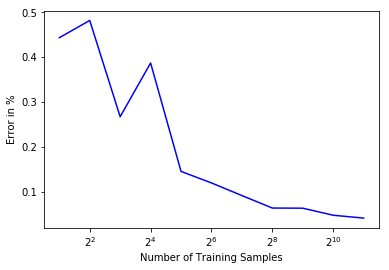

In [28]:
xData, yData = gisette_data()
# Split the dataset into training and test sets of 60:40 ratio
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4)
errors = []
log_scale=[]
for i in range(1,12):
    # Varying the training size using train_test_split function
    xTrain_new, xTest_new, yTrain_new, yTest_new = train_test_split(xTrain, yTrain, shuffle=True, train_size=2**i, test_size=0.2)
    perceptron = Perceptron(100,0.01)
    perceptron.fit(xTrain_new,yTrain_new)    
    guesses = perceptron.predict(xTest)
    calculate_error = (np.sum(guesses != yTest))/len(yTest) 
    log_scale.append(2**i)
    # Append the error list with the above calculated error
    errors.append(calculate_error)    
plt.semilogx(log_scale, errors, 'b-', basex=2)
plt.ylabel('Error in %')
plt.xlabel('Number of Training Samples')
plt.show()

## Answer

**The learning curve shows that the error rate gradually decreases with the increase in the number of training samples. This is because increasing the training data adds information which helps to improve the fit. The error rate fluctuates for training samples < $$2^5$$ and then decreases as the perceptron is not trained enough with sufficient number of training examples**

## Part 3:  Data normalization 

In this section we will explore the effect of normalizing the data, focusing on normalization of features.  The simplest form of normalization is to scale each feature to be in the range [-1, 1].  We'll call this **scaling**.

Here's what you need to do:

  - Explain how to scale the data to be in the range [-1, 1].
  - Compare the accuracy of the perceptron with bias on the original data and the scaled version of the heart dataset.  Does one of them lead to better performance?  Explain why you think this happens.  
  - An alternative way of normalizing the data is to **standardize** it:  for each feature subtract the mean and divide by its standard deviation.  What can you say about the range of the resulting features in this case?  




## Answer

**1. In order to scale the data to be in the range [-1,1] we use the following expression:
                $$x_{normalized} = 2 * (\frac{x-x_{min}}{x_{max}-x_{min}})-1$$
where $$x_{min}$$ and $$x_{max}$$ are the minimum and maximum of the data respectively.**
**Thus, for the heart dataset, maximum and minimum values for each feature is calculated and the normalized data is computed** **according to the above mentioned formula.**

**2. The accuracy of the perceptron with bias on the scaled version is better than that on original data since the error percentage is in the range of 20 to 28 per cent whereas for original data it is in range of 30 to 40 per cent. And, thus, scaled version performs better as normalization scales the data to range of [-1,1] and this eliminates possible outliers and results in smaller standard deviation.**
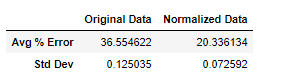

**3. The range of the resulting features would be different for all the features in case of standardizing the data, whereas in normalize, all the features have range [-1,1]**

In [24]:
# Read the Dataset
Heart_Data=np.genfromtxt("processed.cleveland.data.txt", delimiter=",") 
Heart_DataFrame=pd.DataFrame(Heart_Data)
# Mark '?' as Not a Number(NaN)
heart_dataset = Heart_DataFrame.replace('?', np.NaN)
# drop rows with missing values
heart_dataset.dropna(inplace=True, axis='rows')

# Normalization of dataset
# Calculate minimum of each column in the heart dataset
min_data=heart_dataset.min(axis=0)
# Calculate maximum of each column in the heart dataset
max_data=heart_dataset.max(axis=0)
# Formula= 2*((x-min(x))/(max(x)-min(x)))-1
normalized_data=(2*((heart_dataset-min_data)/(max_data-min_data)))-1

# Result in Tabular Format
def compare_data(regular_error, norm_error):
    titles = ['Avg % Error', 'Std Dev']
    reg = pd.Series([stat.mean(regular_error)*100, stat.stdev(regular_error)], index=titles)
    norm = pd.Series([stat.mean(norm_error)*100, stat.stdev(norm_error)], index=titles)
    d = {'Original Data' : reg, 'Normalized Data' : norm}
    df = pd.DataFrame(d)
    return df
#Regular error
xData = heart_dataset[[0,1,2,3,4,5,6,7,8,9,10,11,12]].values.astype(np.float)
yData = heart_dataset[13].values
yData = np.where(yData > 0,1,-1)
error_regular = []
for i in range(10):
    # Split the dataset into training and test sets of 60:40 ratio
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4)
    # Call Perceptron Function with max_iterations=100 and learning rate=0.05
    perceptronReg = Perceptron(100,0.05)
    perceptronReg.fit(xTrain,yTrain)
    guessesp = perceptronReg.predict(xTest)
    error_reg = (np.sum(guessesp != yTest))/(len(yTest))
    error_regular.append(error_reg)
#Normalized error
xData = normalized_data[[0,1,2,3,4,5,6,7,8,9,10,11,12]].values  # Normalized data
yData = heart_dataset[13].values    # Original data
yData = np.where(yData > 0,1,-1)
error_normalized = []
for i in range(10):
    # Split the dataset into training and test sets of 60:40 ratio
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.4)
    # Call Perceptron Function with max_iterations=100 and learning rate=0.05
    perceptronNorm = Perceptron(100,0.05)
    perceptronNorm.fit(xTrain,yTrain)
    guessesn = perceptronNorm.predict(xTest)
    error_norm = (np.sum(guessesn != yTest))/(len(yTest))
    error_normalized.append(error_norm)
# Result Display
compare_data(error_regular, error_normalized)

,Original Data,Normalized Data
Avg % Error,36.554622,20.336134
Std Dev,0.125035,0.072592


### Your Report

Answer the questions in the cells reserved for that purpose.

Mathematical equations should be written as LaTex equations; the assignment contains multiple examples of both inline formulas (such as the one exemplifying the notation for the norm of a vector $||\mathbf{x}||$ and those that appear on separate lines, e.g.:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T \mathbf{x}}.
$$



### Submission

Submit your report as a Jupyter notebook via Canvas.  Running the notebook should generate all the plots and results in your notebook.


### Grading 

Here is what the grade sheet will look like for this assignment.  A few general guidelines for this and future assignments in the course:

  * Your answers should be concise and to the point.  We will take off points if that is not the case.
  * Always provide a description of the method you used to produce a given result in sufficient detail such that the reader can reproduce your results on the basis of the description.  You can use a few lines of python code or pseudo-code.


Grading sheet for the assignment:

```
Part 1:  60 points.
(30 points):  Correct implementation of the classifiers
(15 points):  Good protocol for evaluating classifier accuracy; results are provided in a clear and concise way
(15 points):  Discussion of the results

Part 2:  20 points.
(15 points):  Learning curves are correctly generated and displayed in a clear and readable way
( 5 points):  Discussion of the results

Part 3:  20 points.
( 5 points):  How to perform data scaling
(10 points):  Comparison of normalized/raw data results; discussion of results
( 5 points):  Range of features after standardization
```


Grading will be based on the following criteria:

  * Correctness of answers to math problems
  * Math is formatted as LaTex equations
  * Correct behavior of the required code
  * Easy to understand plots 
  * Overall readability and organization of the notebook
  * Effort in making interesting observations where requested.
  * Conciseness.  Points may be taken off if the notebook is overly 
  